In [1]:
import os 
dir_primary = 'F:/UrbanDataProject/land_surface_temperature/code/analysis'
# os.chdir('/home/tml/research/land_surface_temperature/code/analysis')
os.chdir(dir_primary)
from analysis import *
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.ensemble.partial_dependence import plot_partial_dependence
import os
import glob
code_dir = os.getcwd()
os.chdir('../..')


# Import data

In [2]:
cities = ['bal', 'por', 'det', 'phx']
# import data
grid_size = 500
df = import_data(grid_size)

# Bootstrap Partial Dependence

In [3]:
boot_num = 50

In [4]:
bootstrap_main(df, grid_size, boot_num, do_par = True)

the plot for this is in `partial_dependence_R`

# 2D Partial Dependence

Fit a GBRF to the entire dataset and plot the 2D partial dependence for selected features

In [3]:
# fit the gbrf
from sklearn import preprocessing
df_x, target = prepare_lst_prediction(df)
# df_x  = subset_regression_data(df_x, df_x)[0]
vars_drop = ['city','holdout','x','y']
df_x = df_x.drop(vars_drop, axis=1)
# le = preprocessing.LabelEncoder()
# le.fit(cities)
# list(le.classes_)
# le.transform(df_x.city) 
# df_x.city =le.transform(df_x.city) 
gbm_night = GradientBoostingRegressor(max_depth=2, random_state=RANDOM_SEED, learning_rate=0.1, n_estimators=500, loss='ls')
gbm_night.fit(df_x, target['lst_night_mean'])
gbm_day = GradientBoostingRegressor(max_depth=2, random_state=RANDOM_SEED, learning_rate=0.1, n_estimators=500, loss='ls')
gbm_day.fit(df_x, target['lst_day_mean'])
gbm_night_max = GradientBoostingRegressor(max_depth=2, random_state=RANDOM_SEED, learning_rate=0.1, n_estimators=500, loss='ls')
gbm_night_max.fit(df_x, target['lst_night_max'])
gbm_day_max = GradientBoostingRegressor(max_depth=2, random_state=RANDOM_SEED, learning_rate=0.1, n_estimators=500, loss='ls')
gbm_day_max.fit(df_x, target['lst_day_max'])

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=2, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=500, presort='auto', random_state=3201,
             subsample=1.0, verbose=0, warm_start=False)

In [6]:
list(df_x)

['ndvi_mean',
 'alb_mean',
 'svf_mean',
 'dsm_sd',
 'bldg',
 'tree_mean',
 'lcov_11',
 'svf_max',
 'nbdi_max',
 'tree_max',
 'pdens_mean',
 'dsm_mean',
 'tree_min']

f:\urbandataproject\land_surface_temperature\venv\lib\site-packages\matplotlib\figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


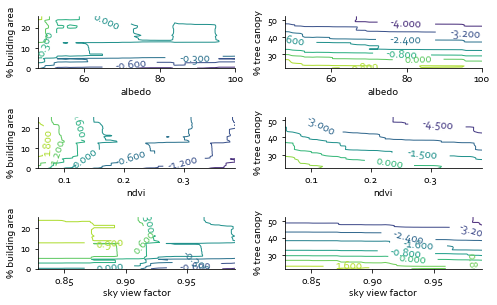

<Figure size 432x288 with 0 Axes>

In [4]:
plot_2d_partialdependence(gbm_night, 'night', grid_size, df_x)

f:\urbandataproject\land_surface_temperature\venv\lib\site-packages\matplotlib\figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


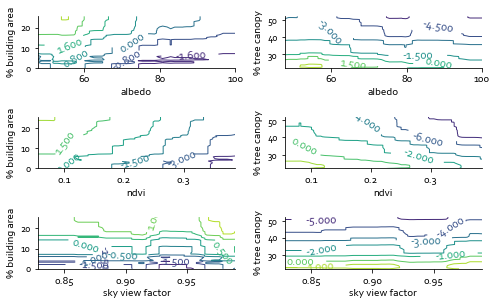

<Figure size 432x288 with 0 Axes>

In [5]:
plot_2d_partialdependence(gbm_day, 'day', grid_size, df_x)

f:\urbandataproject\land_surface_temperature\venv\lib\site-packages\matplotlib\figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


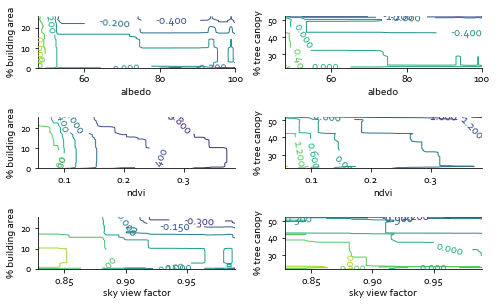

<Figure size 432x288 with 0 Axes>

In [6]:
plot_2d_partialdependence(gbm_night_max, 'night_max', grid_size, df_x)

f:\urbandataproject\land_surface_temperature\venv\lib\site-packages\matplotlib\figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


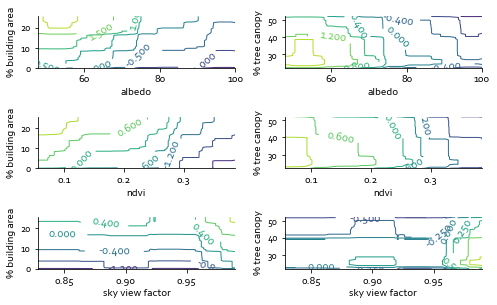

<Figure size 432x288 with 0 Axes>

In [7]:
plot_2d_partialdependence(gbm_day_max, 'day_max', grid_size, df_x)